## <p style="text-align: right;"> Nic Wiggins </p>

# MTH 314 - Midterm Exam 1
This is an open internet exam.  Feel free to use anything on the internet with one important exception...

- **DO NOT** communicate live with other people during the exam (either verbally or on-line).  The goal here is to find answers to problems as you would in the real world.  

Please use paper provided at the front of the room to show your work.  Add your name to the upper right corner of **each page** and put the problem number on the upper left. 

You will be given **70 minutes** to complete this test.  Use your time wisely. 

**HINTS:**
- Neatness is important.  we will ignore all notes or code we can not read.
- Read the entire exam from beginning to end before starting.  Not all questions are equal in points vs. time, so plan your time accordingly.   
- Skip questions you can not answer. 
- Some of the information provided my be a distraction. Do not assume you need to understand everything written to answer the questions. 
- Spaces for answers are provided. However, do not assume that the answer must be in the same format of the cell provided. Feel free to change the cell formatting (ex. markdown to code) or add additional cells as needed to provide your answer.
- When we say "in your own words", it is still okay to Google the answer as a reminder. However, we would like you to do more than copy and paste. Make your own answer. 
- If you get stuck, try not to leave an blank answer. It is better to include some notes or stub functions, so we have an idea about your thinking process to give you partial credit.   
- When you are done, restart the entire notebook and run from beginning to end and make sure your answers still match what you expect. This will ensure you didn't do anything out of order by mistake. 

### Exam Summary
1. (25 points) Traffic Flow Problem
2. (25 points) Quick Questions
2. (25 points) Student Course Matrix 
3. (25 points) Data Science - Principal Component Analysis

In [1]:
# Here are some libraries you may need to use
%matplotlib inline
import numpy as np
import sympy as sym

import matplotlib.pyplot as plt
sym.init_printing(use_unicode=True)

# below was wrong

----
# Question 1 - Traffic Flow Problem

We will consider the traffic flow problem through W. Circle Dr. 
Note that the circle only allows "one way" traffic except the short section connecting Beal St. and Kalamazoo St. (which is two way). 
Also note that the roads connecting to the circle (Abbot Rd, Beal St., Kalamazoo St., Auditorium Rd, and E. Circle Dr.) are all two way streets with traffic flowing both in and out of the circle. 

<img src="https://lh3.googleusercontent.com/dvIKmPMY4LqqDEA423alAymW05j12UUhdyWUbraPqRMM0IdjY96oDlBUfj0sKbGIEwsJChwyqw=w740" width="100%">
 



The flow into and out of the circle at each of the intersections are given the following values (units are vehicles per minute):
   

In [2]:
Bout = 30
Bin = 19
Kout = 18
Kin = 30
Aout = 55
Ain = 32
Eout = 7
Ein = 33
Uout = 25
Uin = 21

<font color=red>**Question a:**</font> Construct a system of equations that describes the flow of traffic around W Circle Dr. 
Note there are six unknowns ($x_1$, $x_{2a}$, $x_{2b}$, $x_3$, $x_4$, and $x_5$), which are also in vehicles per minute. 
We only consider the moving cars, and the cars parked around the circle  are not considered. 
(Hint: the vehicles leaving and entering one section has to be the same)

$$ x_3 + A_{in} = A_{out} + x_4$$
$$ x_4 + E_{in} = E_{out} + x_5 $$
$$ x_5 + U_{in} = U_{out} + x_1 $$
$$ x_1 + B_{in} + x_{2a} = B_{out} + x_{2b} $$
$$ x_{2b} + K_{in} = K_{out} + x_3 + x_{2a} $$

<font color=red>**Question b:**</font> Transform your above equations into a linear system of the form $Ax=b$ and represent that system using an augmented matrix.  

In [3]:
A = np.matrix([[0,0,0,1,-1,0],[0,0,0,0,1,-1],[-1,0,0,0,0,1],[1,1,-1,0,0,0],[0,-1,1,-1,0,0]])
b = np.matrix([[Aout-Ain],[Eout-Ein],[Uout-Uin],[Bout-Bin],[Kout-Kin]])

<font color=red>**Question c:**</font> Calculate the reduced row echelon form of your equation and show the result below.

In [4]:
E = np.concatenate((A,b), axis = 1)
E

matrix([[  0,   0,   0,   1,  -1,   0,  23],
        [  0,   0,   0,   0,   1,  -1, -26],
        [ -1,   0,   0,   0,   0,   1,   4],
        [  1,   1,  -1,   0,   0,   0,  11],
        [  0,  -1,   1,  -1,   0,   0, -12]])

In [5]:
sym.Matrix(E).rref()

⎛⎡1  0  0   0  0  -1  -4 ⎤              ⎞
⎜⎢                       ⎥              ⎟
⎜⎢0  1  -1  0  0  1   15 ⎥              ⎟
⎜⎢                       ⎥              ⎟
⎜⎢0  0  0   1  0  -1  -3 ⎥, (0, 1, 3, 4)⎟
⎜⎢                       ⎥              ⎟
⎜⎢0  0  0   0  1  -1  -26⎥              ⎟
⎜⎢                       ⎥              ⎟
⎝⎣0  0  0   0  0  0    0 ⎦              ⎠

In [6]:
#right answer from class
check = sym.Matrix([[1,0,0,0,0,-1,-4],[0,1,-1,0,0,1,15],[0,0,0,0,0,0,0],[0,0,0,1,0,-1,-3],[0,0,0,0,1,-1,-26],[0,0,0,0,0,0,0]])
check

⎡1  0  0   0  0  -1  -4 ⎤
⎢                       ⎥
⎢0  1  -1  0  0  1   15 ⎥
⎢                       ⎥
⎢0  0  0   0  0  0    0 ⎥
⎢                       ⎥
⎢0  0  0   1  0  -1  -3 ⎥
⎢                       ⎥
⎢0  0  0   0  1  -1  -26⎥
⎢                       ⎥
⎣0  0  0   0  0  0    0 ⎦

<font color=red>**Question d:**</font> How many solutions does this system has? If there are multiple solutions, write down all the solutions with the free variables. 

Infinite 
$$ x_1 = x_5 $$
$$ x_{2a} = x_{2b} - x_5 $$
$$ x_3 = x_5 $$
$$ x_4 = x_5 $$


<font color=red>**Question e:**</font> Given the above inputs, what is the minimum value of flow across $x_5$ (NOTE there can not be negative flow on a one way street). Explain how you got to your answer.

26

----
# Question 2 - (25 points) Quick Question

   

<font color=red>**Question a (5 points):**</font> Block matrix. We have a matrix 
$$K=\left[\begin{matrix}I & A^\top\\A & 0\end{matrix}\right],$$
where $I$ is the identity matrix in $R^{n\times n}$. 
We assume that it makes sense (that means $I$ has the same number of rows as $A^\top$ and the same number of columns of $A$.)
Answer the following questions. 

<font color=red>**Question a.1:**</font> Is $K$ a square matrix? 

Yes

<font color=red>**Question a.2:**</font> Is $A$ a square matrix? 

Does not have to be

<font color=red>**Question a.3:**</font> The determinant of $A$ must be zero?

No

<font color=red>**Question a.4:**</font> Is $K$ symmetric? 

Yes

<font color=red>**Question a.5:**</font> Is zero submatrix is a square matrix? 

Yes

<font color=red>**Question b (5 points):**</font> A computer takes about 0.1 second to multiply two $1000\times 1000$ matrices. How long does it take to multiply two $5000\times 5000$ matrices? Provide your brief reasoning for your answer.

In [7]:
# multiply is O(n**3)
k = 0.1/1000**3
k*5000**3

<font color=red>**Question c (5 points):**</font> Suppose that $A$ is a $5\times 10$ matrix, $B$ is a $20\times 10$ matrix, and $C$ is a $10\times 10$ matrix. Determine whether each of the following expressions make sense. 
If it makes sense, what is the dimension of the resulting matrix.

<font color=red>**Question c.1:**</font> $A^\top A+C$

10 x 10


<font color=red>**Question c.2:**</font> $BC^3$

20 x 10

<font color=red>**Question c.3:**</font> $I+BC^\top$

20 x 10


<font color=red>**Question c.4:**</font> $B^\top - [C~I]$

10 x 20

<font color=red>**Question c.5:**</font> $B \left[\begin{matrix}A\\A\end{matrix}\right] C$

20 x 10

<font color=red>**Question d (5 points):**</font> Multiplication Orders. Provide examples for the following cases. HINT, you can choose row or columns to be 1 for some examples for simplicity.

<font color=red>**Question d.1 (1 point):**</font> Provide two matrices $A$ and $B$ such that $AB$ makes sense but $BA$ does not.

In [25]:
A = np.matrix([[1],[2]])
B = np.matrix([[2,1,5]])
A*B
#B*A

matrix([[ 2,  1,  5],
        [ 4,  2, 10]])

<font color=red>**Question d.2 (2 points):**</font> Provide two matrices $A$ and $B$ such that both $AB$ and $BA$ make sense but they have different sizes.

In [9]:
A = np.matrix([[1],[2]])
B = np.matrix([[2,5]])
A*B
B*A

matrix([[12]])

<font color=red>**Question d.3 (2 ponits):**</font> Provide two matrices $A$ and $B$ such that both $AB$ and $BA$ make sense and they have the same size, but $AB\neq BA$.

In [10]:
A = np.matrix([[1,5],[2,8]])
B = np.matrix([[2,5],[1,1]])
print(A*B)
print(B*A)

[[ 7 10]
 [12 18]]
[[12 50]
 [ 3 13]]


<font color=red>**Question e:**</font> Determinant and Inverse. True of false questions. Just put down True or False.

<font color=red>**Question e.1:**</font> If $A$ is invertible, then $A^2$ is also invertible.

True

<font color=red>**Question e.2:**</font> If $A$ is a square matrix such that $\det(A)=7$, then $\det(2A^\top A^{-1})=7$.

2*7*1/7 = 2 False

<font color=red>**Question e.3:**</font> If there is matrix $D$ of size $n\times n$ such taht $AD=I$, then we also have $DA=I$.

True

<font color=red>**Question e.4:**</font> If $A$ is a square matrix and $Ax=0$ has only the trivial solution $0$, then $\det(A)\neq 0$.

False

<font color=red>**Question e.5:**</font> If $A=\left[\begin{matrix}a & b\\c & d\end{matrix}\right]$ and $ad=bc$, then $A$ is not invertible.

True

----
# Question 3 - (25 points) Student-Course Matrix 

The Office of the Registrar at MSU has a complete list of courses taken by each student over several graduating classes. 
This data is represented as an $m\times n$ matrix $C$, with $c_{ij}=1$ if student $i$ took course $j$, and $c_{ij}=0$ otherwise, for $i=1,\dots,m$ and $j=1,\dots, n$. 
There are $m$ students and $n$ different courses in total in the data set. 
A same course offered in different semester are considered as different courses. 
Therefore, the elements in the matrix can only have $0$ and $1$, because one student can not take exactly the same course in the same semester for twice. 

In this exam, we use a small matrix for 400 students and 200 courses (The real matrix is too big to run in the clas).
The following code will provide a random $400\times 200$ matrix. 
Note that the values will change for each run, but the codes for the problems are the same.

In [11]:
C = (np.random.random((400,200)) < 0.1).astype(float)
C = np.matrix(C)
C

matrix([[1., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [1., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

&#9989; <font color=red>**Question a:**</font>  How to computer the number of students in each course for all courses. Use only the operations for the matrices.

In [12]:
C.T*np.ones((400,1))

matrix([[45.],
        [46.],
        [40.],
        [44.],
        [51.],
        [43.],
        [30.],
        [38.],
        [36.],
        [41.],
        [34.],
        [44.],
        [44.],
        [33.],
        [33.],
        [46.],
        [44.],
        [41.],
        [32.],
        [43.],
        [33.],
        [32.],
        [48.],
        [45.],
        [48.],
        [39.],
        [44.],
        [44.],
        [28.],
        [39.],
        [40.],
        [48.],
        [44.],
        [32.],
        [42.],
        [37.],
        [46.],
        [30.],
        [32.],
        [33.],
        [40.],
        [41.],
        [36.],
        [36.],
        [33.],
        [43.],
        [46.],
        [40.],
        [45.],
        [55.],
        [37.],
        [37.],
        [41.],
        [28.],
        [40.],
        [35.],
        [38.],
        [43.],
        [48.],
        [52.],
        [37.],
        [31.],
        [32.],
        [43.],
        [42.],
        [41.],
        [4

&#9989; <font color=red>**Question b:**</font>  How to computer the total number of courses token by each student for all students. Use only the operations for the matrices.

In [13]:
C*np.ones((200,1))

matrix([[23.],
        [13.],
        [14.],
        [17.],
        [14.],
        [18.],
        [14.],
        [11.],
        [14.],
        [17.],
        [15.],
        [12.],
        [25.],
        [26.],
        [17.],
        [15.],
        [25.],
        [12.],
        [25.],
        [20.],
        [26.],
        [19.],
        [11.],
        [26.],
        [18.],
        [26.],
        [23.],
        [21.],
        [20.],
        [19.],
        [22.],
        [20.],
        [22.],
        [21.],
        [24.],
        [14.],
        [17.],
        [24.],
        [19.],
        [22.],
        [19.],
        [16.],
        [20.],
        [21.],
        [17.],
        [15.],
        [20.],
        [31.],
        [17.],
        [20.],
        [15.],
        [27.],
        [17.],
        [17.],
        [23.],
        [14.],
        [20.],
        [23.],
        [21.],
        [17.],
        [22.],
        [21.],
        [22.],
        [15.],
        [22.],
        [18.],
        [2

&#9989; <font color=red>**Question c:**</font> What is the size of $C C^\top$? What does $(CC^\top)_{ij}$ (i.e., the $i$-th row and $j$-th column of $CC^\top$) mean?

400 x 400

Number of classes i had in common with j

&#9989; <font color=red>**Question d:**</font> For any two courses, how to find the number of students took both courses. Again, we need to do this for all course pairs.

In [14]:
C.T*C

matrix([[45.,  7.,  5., ...,  4.,  8.,  5.],
        [ 7., 46.,  1., ...,  0.,  1.,  2.],
        [ 5.,  1., 40., ...,  2.,  6.,  7.],
        ...,
        [ 4.,  0.,  2., ..., 40.,  6.,  5.],
        [ 8.,  1.,  6., ...,  6., 50.,  9.],
        [ 5.,  2.,  7., ...,  5.,  9., 39.]])

&#9989; <font color=red>**Question e:**</font> Write a small program to test whether or not a matrix $A$ is symmetric, and then apply this on the matrix <font color=blue>$C^\top C$</font> to determine whether it is symmetric or not.

In [15]:
def  check_symmetric(A):
    
    if np.equal(A.all(),A.T.all()):
        print("Symmetric")
    else:
        print("Not symmetric")

check_symmetric(C.transpose()*C)


Symmetric


----
# Question 4 - (25 points) Data Science - Principal Component Analysis



Principla component analysis (PCA) is a powerful tool used to analyze data sets and visulization. 


Suppose there are $m$ individuals. 
We measure the same $n$ variables for each individual. 
We can put the measurement into a $m\times n$ matrix. 
Then PCA will create a low-dimensional representation of the high dimensional ($n$-dimensional) data. 


For the purpose of visualization in the exam, we are given a $100\times 2$ matrix, that is we have $100$ individuals and each individual has two variables. 
We can plot these 100 points in the figure. 
In this example, we have 100 points in two dimensional, and we will find a one dimensional representation for the points. 
That is, we will find a line in the 2D space such that the data points are very close to the line.


In [16]:
np.random.seed(123)
m = 100;
x = 5*np.random.rand(m)
y = 2*x + 1 + 0.2*np.random.randn(m)

x = x.reshape(m, 1)
y = y.reshape(m, 1)

X = np.hstack([x, y])

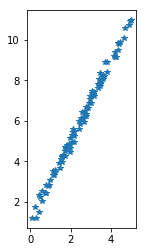

In [17]:
plt.plot(X[:,0], X[:,1], '*')
plt.axis('scaled');

plt.show()

From the plot, we see that all the points are along one line $y=2x+1$ in the $xy$-plane. 
Because this is in 2D, and we can see it. 
In real application, the dimension is very high, and we can not visualize it. 
The purpose of PCA for this given data set is to find the line in the $xy$-plane and project all data points onto this line. 
Next, we will do the following steps to find the line.

&#9989; <font color=red>**Question a:**</font> Find the center point $X_c$ of all the data points, and show it in the plot. 
The variable values for the center point is the average of the variable over all data points. 

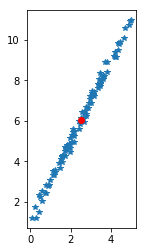

In [19]:
# Finish the following code to find the center point X_c 
X_c = np.array([[x.mean(), y.mean()]])

plt.plot(X[:,0], X[:,1], '*')
plt.plot(X_c[0,0],X_c[0,1],'ro')
plt.axis('scaled');
plt.show()

Then we plot $(X-X_c)$ in the $xy$-plane. 
It moves all the data points such that the center point becomes the original $(0,0)$. 
This is the same as applying a transpose matrix. 
The step is a very important step in many method in data science.

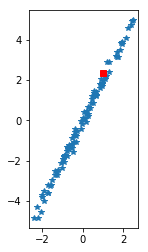

In [20]:
X_1 = X - np.matrix(np.ones((X.shape[0],1)))*X_c
plt.plot(X_1[:,0], X_1[:,1], '*')
plt.plot(X_1[0,0], X_1[0,1], 'rs')
plt.axis('scaled');
plt.show()

&#9989; <font color=red>**Question b:**</font> Find the variance of the data points. The variance is calculated by 
$\sum\limits_i (x_1^i-x_1^c)^2+(x_2^i-x_2^c)^2$, where $x^c=(x_1^c,x_2^c)$ is the center point, and $(x_1^i,x_2^i)$ is the $i$-th data point.  


Matrix operations can simplify your answer. 
You are encouraged to use matrix operations here, but you can use any method. 

In [40]:
np.matmul(np.diag(X_1*X_1.T).reshape(1,-1), np.ones((100,1)))

array([[750.01337218]])

&#9989; <font color=red>**Question c:**</font>  This is an important step for PCA. 
It requires eigen decomposition, which will be covered after this midterm. 
Therefore, in this exam, we assume that we solved this step. 
When we look at the point in Question a, the slop of the line is not $0$. 
In this Question, we need to rotation it such that the slop is close to $0$ (Keep in mind, we want to find a line). 

Look at the figure and approximate the angle that you will need to rotate. 
After the rotation, you may notice that the $y$ values are very small, and the points are very close to the $x$-axis.

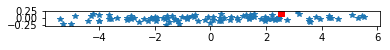

In [58]:
# Finish the following code for the rotation. We put the first point in the plot so you can adjust your angle 

theta = np.radians(63)
J1 = np.matrix([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]]) # J1 is the rotation matrix 
X_2 = X_1*J1


plt.plot(X_2[:,0], X_2[:,1], '*')
plt.plot(X_2[0,0], X_2[0,1], 'rs')
plt.axis('scaled');
plt.show()

&#9989; <font color=red>**Question d:**</font> Since we need to reduce the dimension from $2$ to $1$, we can remove the $y$ values because they are very small. 
So we keep the $x$ values for all data points, and transform them back to the original plot. 
That is, we first rotate all the data points back to have a slop and move the center point to be $X_c$.

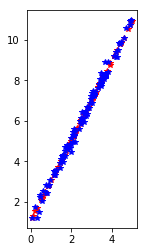

In [59]:
# Finish the following code to transform it back. You should see the new data points are close the orignal points. 
X_2[:,1] = 0
J2 = np.linalg.inv(J1) 
X_3 = X_2*J2+X_c



plt.plot(X_3[:,0], X_3[:,1], 'r*')
plt.plot(X_3[0,0], X_3[0,1], 'bs')
plt.plot(X[:,0], X[:,1], 'b*')
plt.axis('scaled');
plt.show()

&#9989; <font color=red>**Question e:**</font>   Measure the variance for the new data points. Find the variance of the new data points in the same way as the original data points. Compare the new variance with the previous one. 

In [60]:
# Put your answer here. 
np.matmul(np.diag((X_3-X_3.mean(axis=0))*(X_3-X_3.mean(axis=0)).T).reshape(1,-1), np.ones((100,1)))


array([[749.20226158]])

&#9989; <font color=red>**Question f (bonus):**</font>   Change the angle *theta* in the previous code and compute the variance again. Did you get a larger variance or a smaller variance? Try to explain the reason why.

The closer the new variance is to the original variance means it is a better fit. The larger the difference in variance shows that the estimation is further from the original data. The smaller the difference means the model is capturing more and more of the total variance in the original data.

---------
### Congratulations, you're done with your EXAM

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell and restart and check the notebook for errors).

&#169; Copyright 2018,  Michigan State University Board of Trustees